Instructions

**When taking this exam, you agree to follow the Duke Honor Code.**

- This is an OPEN book exam.
- Import any module you need from the standard Python library, `numpy`, `scipy`, `pandas`, `matplotlib` or `seaborn`. Do not use any other 3rd party packages.
- Answer all 5 questions.

**1**. 20 points

- Load the matrix stored in `Q1.npy` into `A` and use factorize using SVD (5 points)
- Find the condition number of `A` from the SVD (5 points)
- Generate the matrix that is the best rank 3 approximation to `A` (5 points)
- Determine how many singular vectors would be needed to explain at least 95% of the variance of the original matrix `A` (5 points)

In [2]:
import numpy as np
import scipy.linalg as la

- Load the matrix stored in `Q1.npy` into `A` and use factorize using SVD (5 points)


In [3]:
A = np.load('Q1.npy')

In [4]:
A

array([[ 0.84807845,  1.54321673,  0.31312243, ...,  8.24001242,
         4.97323637,  7.84631588],
       [-0.53857052,  1.27198196, -0.05287139, ...,  5.1763616 ,
         0.70307245,  4.38496557],
       [-0.33309315,  0.07205011,  1.389645  , ..., -2.24626186,
         4.05977097,  2.86966519],
       ...,
       [ 0.78051951,  3.53918174,  0.72538686, ...,  9.86305368,
         0.82931134,  5.35439896],
       [ 0.50150059, -0.10579057, -0.46748626, ...,  3.31661373,
         1.75445506,  5.00540317],
       [-0.25258979,  1.92020903, -0.33153204, ...,  2.00926665,
         1.12684173,  2.11664949]])

In [5]:
A.shape

(100, 12)

In [6]:
U, s, Vt = la.svd(A)

- Generate the matrix that is the best rank 3 approximation to `A` (5 points)



In [7]:
A3 = U[:, :3] @ np.diag(s[:3]) @ Vt[:3,:]

In [8]:
A3

array([[ 0.29729009,  2.20677283,  0.78864987, ...,  8.59344029,
         4.93757121,  8.87158733],
       [ 0.46934858,  1.50369645, -0.14481231, ...,  5.93130652,
         1.21140329,  4.12958094],
       [-1.0764932 , -0.41385293,  0.94748403, ..., -0.92771243,
         3.75649444,  1.74809577],
       ...,
       [ 0.76116011,  2.27362009, -0.61260421, ...,  9.15124582,
         0.80119961,  5.1968386 ],
       [ 0.709774  ,  1.21703559,  0.52015654, ...,  3.94235488,
         1.7940456 ,  4.80331962],
       [ 0.03181498,  0.54641622,  0.29661635, ...,  2.11950844,
         1.54690385,  2.48246117]])

In [9]:
A3.shape

(100, 12)

In [10]:
k = (s[0]/s < 15).sum()

In [11]:
B = U[:, :k] @ np.diag(s[:k]) @ Vt[:k,:]

In [12]:
B

array([[ 0.43341498,  1.98579414,  0.62864306, ...,  8.03582024,
         4.77872585,  8.00205879],
       [-0.14154168,  1.3457275 ,  0.3443699 , ...,  5.91542727,
         0.49192135,  3.99393859],
       [ 0.46196781, -0.08906886,  1.27294164, ..., -1.50260182,
         4.1864414 ,  2.30863285],
       ...,
       [ 0.69298873,  2.64286195,  0.16877436, ...,  9.37949973,
         1.0923083 ,  5.7530914 ],
       [ 0.78332247,  1.07457169, -0.16023442, ...,  3.77161236,
         1.69193969,  4.41387249],
       [-0.56753096,  0.87207484, -0.30702455, ...,  1.78597436,
         0.98851743,  2.64790546]])

- Find the condition number of `A` from the SVD (5 points)

Note:

- You should use the SVD to find this

In [13]:
s[0]/s[-1]

19.8402505790496

In [14]:
np.linalg.cond(A)

19.840250579049602

- Determine how many singular vectors would be needed to explain at least 95% of the variance of the original matrix `A` (5 points)]

Note:

- Do not need to square s

In [15]:
v = s/s.sum()
v = v.cumsum()

In [16]:
1 + (v < 0.95).sum()

11

In [17]:
list(enumerate(np.cumsum(s/s.sum()), start=1))

[(1, 0.5345017135887489),
 (2, 0.6243639523639966),
 (3, 0.6700272605895616),
 (4, 0.7148569709920749),
 (5, 0.7578839044688142),
 (6, 0.7974400999576216),
 (7, 0.8359429481624789),
 (8, 0.872848205700848),
 (9, 0.9092389941458603),
 (10, 0.9416425887115568),
 (11, 0.9730597296914605),
 (12, 0.9999999999999998)]

In [18]:
X = A - A.mean(axis=0)
C = (X.T @ X)/(len(X) - 1)
C

array([[ 1.04757834e+00,  2.45112855e-01,  8.77303625e-03,
         4.08580148e-01,  4.18145450e-02,  3.19890377e-01,
         9.67676792e-02,  7.17523185e-01, -2.21003214e-01,
         9.36827216e-01,  2.53018680e-02,  6.95770393e-01],
       [ 2.45112855e-01,  1.23680029e+00, -8.06373985e-02,
         9.45760064e-01,  3.91581734e-01,  8.33169797e-01,
         7.11401544e-01,  2.21432172e+00, -3.46808769e-01,
         3.35848717e+00,  3.38107055e-01,  2.20478390e+00],
       [ 8.77303625e-03, -8.06373985e-02,  9.68761796e-01,
        -1.29188798e-01, -1.46012550e-01,  1.28493541e-02,
        -3.81816656e-02, -3.27945248e-01,  3.29143506e-01,
        -3.61840405e-01,  3.49310494e-01,  1.56076570e-01],
       [ 4.08580148e-01,  9.45760064e-01, -1.29188798e-01,
         2.59449768e+00,  5.07420977e-01,  1.21714798e+00,
         1.13010178e+00,  3.20349468e+00, -3.19311275e-01,
         4.64239972e+00,  7.58027622e-01,  2.96579439e+00],
       [ 4.18145450e-02,  3.91581734e-01, -1.4601255

Check with PCA

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA()
pca.fit(A)

PCA()

In [21]:
pca.explained_variance_ratio_

array([0.7371282 , 0.07605298, 0.02703356, 0.0261325 , 0.02432035,
       0.02023653, 0.01928565, 0.0175115 , 0.01739516, 0.01379243,
       0.01296153, 0.00814961])

**2**. 20 points

- Load the matrix in `Q2.npy` - this consists of two columns representing the x and y coordinates of 10 points
- Find the equation of the circle that best fits these points (15 points)
- Plot the points and fitted circle (5 points)

Hint: You need to estimate the center of the circle and its radius.

In [22]:
X = np.load('Q2.npy')

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

- Find the equation of the circle that best fits these points (15 points)



In [24]:
A = np.c_[2*X, np.ones(X.shape[0])]

In [25]:
sol = la.lstsq(A, np.sum(X**2, axis=1))[0]

In [26]:
a, b, z = sol

In [27]:
r = np.sqrt(z - a**2 - b**2)

In [28]:
x = np.linspace(a-r, a+r, 20)
y = np.sqrt(np.abs(r**2 - x**2))

In [29]:
r, a, b

(2.0069277559382903, 0.023593590975478498, -0.03527051891705024)

- Plot the points and fitted circle (5 points)



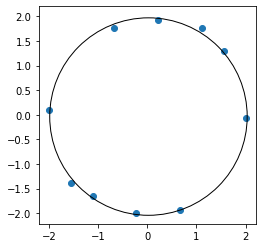

In [30]:
plt.scatter(X[:,0], X[:,1])
c = plt.Circle([a,b], r, fill=False)
plt.gca().add_artist(c, )
plt.axis('square')
pass

**3**. 20 points

The figure below shows the current population of Durham, Chapel Hill and Raleigh. Arrows show fractions that move between cities each year.

- What are the population sizes of the 3 cities after 3 years have passed? (5 points)
- Find the steady state population of the 3 cities by solving a linear system. (15 points)

Assume no births, deaths or any other fluxes other than those shown.

![img](Q3.png)


M = np.array([
    [0.9, 0.05, 0.05],
    [0.2, 0.5, 0.3],
    [0, 0.2, 0.8]
]).T

M

In [31]:
M = np.array([ [0.9, 0.05, 0.05], [0.2, 0.5, 0.3], [0, 0.2, 0.8] ]).T

M

array([[0.9 , 0.2 , 0.  ],
       [0.05, 0.5 , 0.2 ],
       [0.05, 0.3 , 0.8 ]])

In [32]:
x = np.array([300000, 80000, 500000])[:, None]

- What are the population sizes of the 3 cities after 3 years have passed? (5 points)



In [33]:
(np.linalg.matrix_power(M, 3) @ x).astype('int')

array([[295480],
       [186620],
       [397900]])

In [34]:
np.array([[295480],
       [186620],
       [397900]]).sum()

880000

- Find the steady state population of the 3 cities by solving a linear system. (15 points)

Note

- You are asked for the steady state *population*
- A check for both cases is that total population does not change

In [35]:
T = M - np.eye(3)
T[-1,:] = [1,1,1]
T

array([[-0.1 ,  0.2 ,  0.  ],
       [ 0.05, -0.5 ,  0.2 ],
       [ 1.  ,  1.  ,  1.  ]])

In [36]:
p = la.solve(T, np.array([0,0,1]))

In [37]:
p * x.sum()

array([352000., 176000., 352000.])

In [38]:
p

array([0.4, 0.2, 0.4])

In [39]:
M @ p

array([0.4, 0.2, 0.4])

**4**. 20 points

Consider the following matrix

```
A = np.array([
    [5,2],
    [2,5]
])
```

- Find the characteristic polynomial of the matrix `A` (5 points)
- Find the eigenvalues using the companion matrix method `C` (5 points)
- Find a matrix `P` such that $A = P C P^{-1}$ (10 points)

In [40]:
A = np.array([
    [5,2],
    [2,5]
])

- Find the characteristic polynomial of the matrix `A` (5 points)



In [41]:
p = np.poly1d([1, -10, 21])

In [42]:
np.roots(p)

array([7., 3.])

- Find the eigenvalues using the companion matrix method `C` (5 points)

In [43]:
C = np.array([
    [10, -21],
    [1, 0]
])

In [44]:
np.linalg.eigvals(C)

array([7., 3.])

- Find a matrix `P` such that $A = P C P^{-1}$ (10 points)

Note:

Use $A = V \Lambda V^{-}$ and $C = Q \Lambda Q^{-1}$ to get $A = V Q^{-1} C Q V^{-1}$ - i.e. $P = V Q^{-1}$

In [45]:
e1, P1 = np.linalg.eigh(A)
idx = np.argsort(e1)
e1 = e1[idx]
P1 = P1[:, idx]

In [46]:
e2, P2 = np.linalg.eig(C)
idx = np.argsort(e2)
e2 = e2[idx]
P2 = P2[:, idx]

In [47]:
P = P1 @ np.linalg.inv(P2) 
P

array([[ 1.80901699, -7.66311896],
       [ 0.69098301,  0.16311896]])

Check

In [48]:
P @ C @ np.linalg.inv(P)

array([[5., 2.],
       [2., 5.]])

**5**. 20 points

The file `Q5.npy` contains the x and y coordinates in cols 1 and 2 respectively. 

- Find a cubic polynomial model to fit the data using the normal equations (5 points)
- Now solve using mini-batch gradient descent Use a learning rate of 0.0001. Start with a guess of a=1, b=1, c=1, d=1 for the model $ax^3 + bx^2 + cx + d$, and report $(a, b, c, d)$ after 1,000 epochs with a batch size of 5. (15 points)

For simplicity, you don't need to randomize the order when choosing data for each batch.

In [55]:
x, y = np.load('Q5.npy').T

In [56]:
y = y[:, None]

- Find a cubic polynomial model to fit the data using the normal equations (5 points)



In [57]:
X = np.c_[x**3, x**2, x, np.ones_like(x)]

In [58]:
np.linalg.solve(X.T@X, X.T@y)

array([[ 0.99809019],
       [-0.54438689],
       [-1.02188927],
       [-1.99235962]])

- Now solve using mini-batch gradient descent Use a learning rate of 0.0001. Start with a guess of a=1, b=1, c=1, d=1 for the model $ax^3 + bx^2 + cx + d$, and report $(a, b, c, d)$ after 1,000 epochs with a batch size of 5. (15 points)

Note

- Each epoch has to run through all mini-batch samples
- Use vanilla gradient descent not RMSProp or momentum

In [59]:
def f(beta, X):
    """...."""
    
    return X@beta

In [60]:
def grad(beta, X, y):
    """Gradient of function."""
    
    return X.T @ X @ beta - X.T @ y

In [61]:
def gd(beta, X, y, f, grad, alpha=0.0001, epochs=1000, batch_size=5):
    """Gradient descent."""
    
    n = X.shape[0]
    for i in range(epochs):
        for j in range(n // batch_size):
            Xb = X[j*batch_size:(j+1)*batch_size, :]
            yb = y[j*batch_size:(j+1)*batch_size, :]
            beta = beta - alpha * grad(beta, Xb, yb)
    return beta

In [62]:
β0 = np.array([1,1,1,1])[:, None]

In [63]:
β0.shape, X.shape, y.shape

((4, 1), (100, 4), (100, 1))

In [64]:
β = gd(β0, X, y, f, grad)
β

array([[ 0.99847178],
       [-0.54891709],
       [-1.00882508],
       [-1.96375165]])

In [65]:
X @ β - y

array([[-0.00877348],
       [-1.1121803 ],
       [-1.67392435],
       [ 0.57183635],
       [ 0.15382327],
       [ 0.72427875],
       [-0.16675941],
       [ 0.88598876],
       [-1.01584996],
       [ 0.86305452],
       [ 0.13086311],
       [ 0.88300682],
       [-0.01266988],
       [ 0.17138606],
       [ 0.03574326],
       [-0.12556014],
       [-0.83891503],
       [ 1.58153972],
       [-1.19358259],
       [-0.85813904],
       [ 2.06970168],
       [ 0.3164233 ],
       [-1.35844054],
       [ 0.19235789],
       [ 0.58768451],
       [-0.93092231],
       [ 1.21532282],
       [-1.46526079],
       [-1.28435645],
       [-0.34830367],
       [ 1.17966961],
       [-1.07408398],
       [ 0.26738416],
       [-0.54740982],
       [ 0.69428071],
       [ 0.54800766],
       [ 2.69114997],
       [ 0.55025764],
       [-0.84743966],
       [ 1.52349636],
       [-0.4614905 ],
       [-1.33493576],
       [-0.23827781],
       [ 0.40965181],
       [ 0.34297172],
       [-1